# MTH4000 Programming in Python I - Lab 3
Dr Matthew Lewis and Prof. Thomas Prellberg

## Exercises

Note that ***Reading and Understanding the Instructions*** is part of doing your work. This is always true, but especially in this coursework there are places where you will invariably get lost if you don't follow this strategy.

### Exercise 1: Nested lists

If we remove the `sum()` in the code of Exercise 2 in last week's lab workbook, we don't compute the sum of list entries, and the output is a list whose entries are themselves lists. 

In [1]:
print([sum([3*k*(k+1)+1 for k in range(n)]) for n in range(5)])
print([    [3*k*(k+1)+1 for k in range(n)]  for n in range(5)])

[0, 1, 8, 27, 64]
[[], [1], [1, 7], [1, 7, 19], [1, 7, 19, 37]]


**Make sure you really understand the above code** (for example, why in the second print statement the first list entry is given by `[]`). 

It might help to pull the code apart a bit more. The code `[3*k*(k+1)+1 for k in range(n)]` gets computed five times, for values of $n$ from $0$ to 4:

In [2]:
print([3*k*(k+1)+1 for k in range(0)])
print([3*k*(k+1)+1 for k in range(1)])
print([3*k*(k+1)+1 for k in range(2)])
print([3*k*(k+1)+1 for k in range(3)])
print([3*k*(k+1)+1 for k in range(4)])

[]
[1]
[1, 7]
[1, 7, 19]
[1, 7, 19, 37]


The five results of these computations then get put into a list, producing the output given above.

Once you you understand what is going on here, you can test your understanding by trying to create the following three lists of lists using list comprehension:

1. $$[\,[0, 0],\, [1, 1],\, [2, 4],\, [3, 9],\, [4, 16],\, [5, 25],\, [6, 36],\, [7, 49]\,]\:,$$ 


2. $$[\,[0],\, [0, 1],\, [0,1,2],\, [0,1,2,3],\, [0,1,2,3,4]\,]\:,$$


3. $$[\,[1],\, [1, 2],\, [1,2,3],\, [1,2,3,4],\, [1,2,3,4,5],\, [1,2,3,4,5,6]\,]\:.$$

**Hint:** if you don't immediately see the patterns, try first using pen and paper to write down some ideas and test them.

In [13]:
print([[n,n**2] for n in range(7)])
print([[k for k in range(n)]  for n in range(1,6)])
print([[k+1 for k in range(n)]  for n in range(1,7)])

[[0, 0], [1, 1], [2, 4], [3, 9], [4, 16], [5, 25], [6, 36]]
[[0], [0, 1], [0, 1, 2], [0, 1, 2, 3], [0, 1, 2, 3, 4]]
[[1], [1, 2], [1, 2, 3], [1, 2, 3, 4], [1, 2, 3, 4, 5], [1, 2, 3, 4, 5, 6]]


### Exercise 2: the Ruler Function

We would like you look at the [Ruler Function](https://en.wikipedia.org/wiki/Ruler_function), which counts the number of times a positive integer $n$ can be evenly divided by two. A cool way of determining this is to consider the binary representation of integers and getting the number of trailing zeros, using the built-in `bin()` function. Binary numbers are shown as strings of zeros and ones with a leading "0b", so for example the binary representation of $20=16+4=2^4+2^2$ is given by `0b10100`.

In [14]:
bin(20)

'0b10100'

We see that there are two trailing zeros, corresponding to the fact that $20=5\times 2^2$.

We can strip the trailing zeros with the `.rstrip()` method.

In [15]:
bin(20).rstrip("0")

'0b101'

This shortens the string to `0b101` and we can compute the difference in length, using the `len()` function.

In [16]:
len(bin(20))-len(bin(20).rstrip("0"))

2

In other words, the number of times a positive integer `n` can be evenly divided by two can be computed using
```python
    len(bin(n))-len(bin(n).rstrip("0"))
```

Produce two plots of the graph of the ruler function for integers $n$ from $0$ to $2^8-1$ and from $0$ to $2^{16}-1$, respectively.

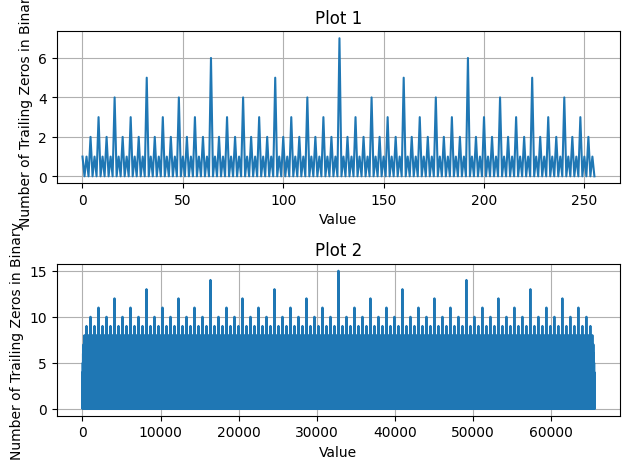

In [32]:
import numpy as np
import matplotlib.pyplot as plt


x = np.arange(0, 2**8) 

y1 = [len(bin(i)) - len(bin(i).rstrip("0")) for i in x]


plt.subplot(2, 1, 1)  
plt.plot(x, y1)
plt.xlabel('Value')
plt.ylabel('Number of Trailing Zeros in Binary')
plt.title('Plot 1')
plt.grid(True)

x2 = np.arange(0, 2**16) 
y2 = [len(bin(i)) - len(bin(i).rstrip("0")) for i in x2]

plt.subplot(2, 1, 2)
plt.plot(x2, y2)
plt.xlabel('Value')
plt.ylabel('Number of Trailing Zeros in Binary')
plt.title('Plot 2')
plt.grid(True)

plt.tight_layout()

plt.show()


### Exercise 3:  Thomae's Function

Similar to our discussion of Euler's totient function $\varphi(n)$, we would like you to look at [Thomae's function](https://en.wikipedia.org/wiki/Thomae%27s_function), which is defined by:

$$f(x)=\begin{cases}
  \frac{1}{q} &\text{if }x = \tfrac{p}{q}\quad (x \text{ is rational), with } p \in \mathbb Z \text{ and } q \in \mathbb N \text{ coprime}\\
  0           &\text{if }x \text{ is irrational.}
\end{cases}$$

Thomae's function is difficult to graph, as it is discontinuous at infinitely many points (specifically, at **all** rational numbers).  We can however, plot a good approximation of the graph of this function on the domain $(0,1)$ using the following algorithm:

1.  Fix some value $m\in\mathbb{N}$.  Our graph will consist of values $\{\frac{i}{m}\,:\, i\in\{1,\ldots,m-1\}\}$ along the x-axis.


2.  For each value $i\in \{1,\ldots,m-1\}$, compute the greatest common divisor of $i$ and $m$, then divide this value by $m$.  These will be our y-axis values.


3.  Plot the resulting figure produced from these x-values and y-values.

Implement this algorithm in the code box below.  For best results, choose a large value of $m$ that has many different prime factors.

510510


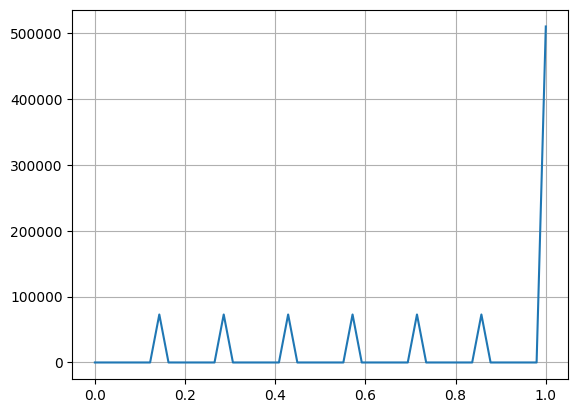

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

m = 2*3*5*7*11*13*17
print(m)

i = np.linspace(1,m)
x = i/m

y = []

for k in range(len(i)):
    y.append(math.gcd(int(i[k]),m))
    
plt.plot(x,y)
plt.grid('true')
plt.show()

You should find that your graph is dependent on your choice of $m$.  What happens if you choose a value of $m$ that is prime?  Can you see why this happens?

### Exercise 4: More on the Riemann Zeta Function

This is a continuation of last week's exercise, to do more numerical computations using our improved knowledge of Python. Recall the Riemann Zeta function 

$$\zeta(s)=\sum_{n=1}^\infty\frac1{n^s}\;.$$

Last week you computed a few partial sums. Using list comprehension, we can simplify the code quite considerably, and easily include hundreds of terms or more.

#### Exercise 4.a: Compute the $100$th, $400$th, $1600$th partial sums for $s=2,4,6$.Compare against the exactly known values. How many digits agreement do you find with the $1600$th partial sums?

In [2]:
import math

values = [2,4,6]

actual_values = [(math.pi**2)/6,(math.pi**4)/90,(math.pi**6)/945]

for i in range(3):
    print(actual_values[i],sum([1/(k**values[i]) for k in range(1,100)]),"\n")
    
print("")

for i in range(3):
    print(actual_values[i],sum([1/(k**values[i]) for k in range(1,400)]),"\n")
    
print("")

for i in range(3):
    print(actual_values[i],sum([1/(k**values[i]) for k in range(1,1600)]),"\n")

1.6449340668482264 1.6348839001848923 

1.082323233711138 1.0823228953444728 

1.017343061984449 1.0173430619639436 


1.6449340668482264 1.6424309392440628 

1.082323233711138 1.0823232284832403 

1.017343061984449 1.0173430619844284 


1.6449340668482264 1.6443088714950378 

1.082323233711138 1.0823232336296822 

1.017343061984449 1.017343061984441 



#### Advanced:

$\zeta(s)$ also can be expressed as an infinite product over all primes,

$$\zeta(s)=\prod_p\left(\frac1{1-p^{-s}}\right)\;,$$

where the product is over the primes $p=2,3,5,7,11,13,\ldots$. 

For the product formula we need an easy way of accessing the $n$-th prime. Fortunately, there already exists a prime function in a Python module (you can find stuff like this with Google) which we can access using `from sympy import prime`.

#### Exercise 4.b: Using the `prime` function, print a list of the first $20$ prime numbers, and print the $1000$th prime number.

In [4]:
from sympy import prime

print([prime(k) for k in range(1,21)])

print(prime(1000))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71]
7919


Computing primes is a bit slow, so we pre-compute 1600 primes to use for the next part of the exercise.

Patience, this takes about a minute or so.

In [5]:
list_of_primes = [prime(k) for k in range(1,1601)]

Note that the n-th prime can now be accessed by `primes[n-1]`

#### Exercise 4.c: Compute the $100$th, $400$th and $1600$th partial products for $s=2,4,6$, and compare against the known values. How many digits agreement do you find with the $1600$th partial products?

You will notice that your code takes considerably more time to execute, due to the need to repeatedly use multiplication, division, powers, and calling `prime`. 

Similarly to evaluating the sum of a set of values in a list, we can find the product by using the function `numpy.prod`, instead of the built-in `sum` function.

In [6]:
values =[2,4,6]
actual_values = [(math.pi**2)/6,(math.pi**4)/90,(math.pi**6)/945]


for i in range(len(values)):
    listed =[]
    print(actual_values[i],"\n")
    for j in range(len(list_of_primes)):
        listed.append(1/(1-(list_of_primes[j]**-values[i])))
    print(np.prod(listed),"\n")

1.6449340668482264 

1.6449224348549059 

1.082323233711138 

1.0823232337111923 

1.017343061984449 

1.0173430619844526 



## Submit your Jupyter Notebook to QMPLUS

Once you are done, save the jupyter notebook and submit it to QMPLUS under Lab Report Week 3.